### NPZ 파일 로딩

In [1]:
!ls # 현재 작업 폴더의 내부(폴더, 파일 살펴보기)

drive  sample_data


In [2]:
!pwd # 현재 경로 확인

/content


In [ ]:
# /content/drive/MyDrive/Colab Notebooks/DeepLearning_빅데/data/cats_dogs.npz

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning_빅데 # 경로 변경

/content/drive/MyDrive/Colab Notebooks/DeepLearning_빅데


In [4]:
!pwd

/content/drive/MyDrive/Colab Notebooks/DeepLearning_빅데


In [ ]:
!ls

 data
'ex01_딥러닝맛보기(성적데이터예측).ipynb'
 ex02_폐암데이터_이진분류.ipynb
 ex03_iris데이터활용_다중분류실습.ipynb
 ex04_mlp_활성화,최적화함수비교_패션데이터_다중분류.ipynb
 ex05._손글씨숫자데이터ipynb.ipynb
 ex07_개_고양이_사진분류_CNN.ipynb
 Final_Project-master
 model
 Untitled0.ipynb
 Untitled3.ipynb


In [5]:
import numpy as np

In [6]:
data = np.load('./data/cats_dogs.npz')
# 딕셔너리 구조로 저장되어 있음

In [7]:
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2000, 224, 224, 3)
(2000,)
(1000, 224, 224, 3)
(1000,)


### 목표
- CNN 모델을 활용하여 개, 고양이 이진 클래스를 분류하는 모델을 만들어보자
- 모델의 성능을 개선시켜보자
- 데이터 증식, 전이학습 (기존의 학습이 잘 되어있는 모델 사용하기)



### MLP 모델 학습

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model_mlp = Sequential()

model_mlp.add(Flatten(input_shape = (224,224,3)))  # 1차원으로 (mlp 쌓기 전)
model_mlp.add(Dense(256, activation = 'relu'))
model_mlp.add(Dense(128, activation = 'relu'))
model_mlp.add(Dense(64, activation = 'relu'))
model_mlp.add(Dense(1, activation = 'sigmoid'))  # 출력층

In [ ]:
 # mlp 모델 학습/평가 방법 설정
model_mlp.compile( loss = 'binary_crossentropy',
                   optimizer ='adam',
                   metrics=['accuracy'])

In [ ]:
# 조기중단 설정
early_st = EarlyStopping('val_accuracy',
                         patience = 5)

In [ ]:
# 학습
mlp_history = model_mlp.fit(X_train, y_train,
                            validation_split = 0.3,
                            epochs = 100,
                            callbacks = [early_st])

Epoch 1/100
44/44 [==============================] - 3s 27ms/step - loss: 463.6220 - accuracy: 0.5914 - val_loss: 2670.4937 - val_accuracy: 0.0000e+00
Epoch 2/100
44/44 [==============================] - 1s 16ms/step - loss: 237.2773 - accuracy: 0.6300 - val_loss: 244.8248 - val_accuracy: 0.2150
Epoch 3/100
44/44 [==============================] - 1s 14ms/step - loss: 78.2310 - accuracy: 0.6264 - val_loss: 1.2447 - val_accuracy: 0.9800
Epoch 4/100
44/44 [==============================] - 1s 14ms/step - loss: 94.7168 - accuracy: 0.6500 - val_loss: 48.7749 - val_accuracy: 0.6233
Epoch 5/100
44/44 [==============================] - 1s 14ms/step - loss: 62.7713 - accuracy: 0.6729 - val_loss: 269.7457 - val_accuracy: 0.0167
Epoch 6/100
44/44 [==============================] - 1s 17ms/step - loss: 74.8517 - accuracy: 0.6071 - val_loss: 49.9479 - val_accuracy: 0.3800
Epoch 7/100
44/44 [==============================] - 1s 15ms/step - loss: 13.8417 - accuracy: 0.7100 - val_loss: 2.6033 - val_a

In [ ]:
# 평가
model_mlp.evaluate(X_test, y_test)

32/32 [==============================] - 0s 5ms/step - loss: 76.7462 - accuracy: 0.5130


[76.74624633789062, 0.5130000114440918]

### CNN 모델 학습

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# CNN 모델 구조 설계
model_cnn = Sequential()

# 특성추출부(cnn)
model_cnn.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(224,224,3)))
model_cnn.add(MaxPooling2D(pool_size = 2))

model_cnn.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size = 2))

model_cnn.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size = 2))

model_cnn.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model_cnn.add(MaxPooling2D(pool_size = 2))

# 분류부(mlp)
# 1차원으로 데이터를 펴주어야 함!
model_cnn.add(Flatten())
model_cnn.add(Dense(512, activation = 'relu'))
model_cnn.add(Dense(1, activation = 'sigmoid'))  # 출력층



In [ ]:
# CNN 모델 학습/평가 방법 설정
model_cnn.compile( loss = 'binary_crossentropy',
                   optimizer = Adam(learning_rate = 0.001),
                   metrics=['accuracy'])

In [ ]:
# 학습
cnn_history = model_cnn.fit(X_train, y_train,
                            validation_split = 0.3,
                            epochs = 100,
                            callbacks = [early_st])

Epoch 1/100
44/44 [==============================] - 5s 62ms/step - loss: 14.4895 - accuracy: 0.6386 - val_loss: 1.5980 - val_accuracy: 0.0000e+00
Epoch 2/100
44/44 [==============================] - 2s 54ms/step - loss: 0.5964 - accuracy: 0.7121 - val_loss: 1.2335 - val_accuracy: 0.0000e+00
Epoch 3/100
44/44 [==============================] - 2s 56ms/step - loss: 0.5709 - accuracy: 0.7093 - val_loss: 1.2334 - val_accuracy: 0.0317
Epoch 4/100
44/44 [==============================] - 2s 53ms/step - loss: 0.5417 - accuracy: 0.7343 - val_loss: 0.8615 - val_accuracy: 0.2150
Epoch 5/100
44/44 [==============================] - 2s 54ms/step - loss: 0.5570 - accuracy: 0.7264 - val_loss: 1.2959 - val_accuracy: 0.0417
Epoch 6/100
44/44 [==============================] - 2s 54ms/step - loss: 0.5070 - accuracy: 0.7629 - val_loss: 1.0202 - val_accuracy: 0.1417
Epoch 7/100
44/44 [==============================] - 2s 53ms/step - loss: 0.4345 - accuracy: 0.7900 - val_loss: 1.8709 - val_accuracy: 0.10

In [ ]:

range(1, len(cnn_history.history['accuracy']) + 1)

In [10]:
import matplotlib.pyplot as plt

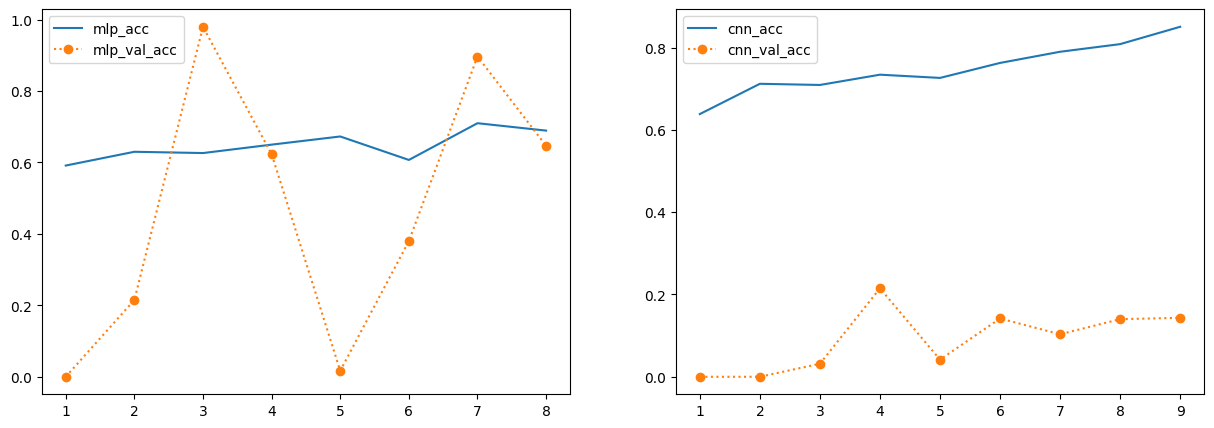

In [ ]:
# mlp, cnn 학습 결과 시각화
plt.figure(figsize  = (15,5))

plt.subplot(1,2,1)
x_range = range(1, len(mlp_history.history['accuracy']) + 1)
plt.plot(x_range, mlp_history.history['accuracy'], label = 'mlp_acc')
plt.plot(x_range, mlp_history.history['val_accuracy'], label = 'mlp_val_acc',
         marker = 'o', ls = ':')
plt.legend()

plt.subplot(1,2,2)
x_range = range(1, len(cnn_history.history['accuracy']) + 1)
plt.plot(x_range, cnn_history.history['accuracy'], label = 'cnn_acc')
plt.plot(x_range, cnn_history.history['val_accuracy'], label = 'cnn_val_acc',
         marker = 'o', ls = ':')
plt.legend()
plt.show()

### 과대적합 방지
- Dropout : 일정한 비율만큼 랜덤으로 중간츠으이 뉴런을 비활성화, 과도한 학습을 방지.
- Data aumentation(데이터 증식) :
    - 데이터 증식을 위해 Image Data Generator 사용
    - 학습 시간 오래 걸림

In [ ]:
# CNN 모델 구조 설계
model_cnn = Sequential()

# 특성추출부(cnn)
model_cnn.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(224,224,3)))
model_cnn.add(Dropout(0.25))
model_cnn.add(MaxPooling2D(pool_size = 2))

model_cnn.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_cnn.add(Dropout(0.25))
model_cnn.add(MaxPooling2D(pool_size = 2))

model_cnn.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model_cnn.add(Dropout(0.25))
model_cnn.add(MaxPooling2D(pool_size = 2))

model_cnn.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model_cnn.add(Dropout(0.25))
model_cnn.add(MaxPooling2D(pool_size = 2))

# 분류부(mlp)
# 1차원으로 데이터를 펴주어야 함!
model_cnn.add(Flatten())
model_cnn.add(Dense(512, activation = 'relu'))
model_cnn.add(Dense(1, activation = 'sigmoid'))  # 출력층

In [ ]:
# CNN 모델 학습/평가 방법 설정
model_cnn.compile( loss = 'binary_crossentropy',
                   optimizer = Adam(learning_rate = 0.001),
                   metrics=['accuracy'])

In [ ]:
# 학습
cnn_history = model_cnn.fit(X_train, y_train,
                            validation_split = 0.3,
                            epochs = 100,
                            callbacks = [early_st])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 이미지 증식

In [12]:
# 데이터 확장
train_gen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.15,  # 반시계 방향으로 돌리기
                   zoom_range = 0.2,    # 0.2배로 축소/확대
                   horizontal_flip = True # 수평방향으로 뒤집기
                   )

test_gen = ImageDataGenerator(rescale = 1./255)

# 데이터 경로 설정
train_dir = './data/cats_and_dogs_filtered/train'
test_dir = './data/cats_and_dogs_filtered/test'

train_generator = train_gen.flow_from_directory(
    train_dir,  # 폴더경로
    target_size = (224,224),  # 변환할 이미지 크기
    batch_size = 10,          # 한번에 변환시킬 이미지 개수
    class_mode = 'binary'     # 라벨링 0부터 시작, 알파벳 순서로 폴더 읽음
)

test_generator = test_gen.flow_from_directory(
    test_dir,  # 폴더경로
    target_size = (224,224),  # 변환할 이미지 크기
    batch_size = 10,          # 한번에 변환시킬 이미지 개수
    class_mode = 'binary'     # 라벨링 0부터 시작, 알파벳 순서로 폴더 읽음

)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
# CNN 모델 구조 설계
model_cnn = Sequential()

# 특성추출부(cnn)
model_cnn.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(224,224,3)))
model_cnn.add(Dropout(0.25))
model_cnn.add(MaxPooling2D(pool_size = 2))

model_cnn.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_cnn.add(Dropout(0.25))
model_cnn.add(MaxPooling2D(pool_size = 2))

model_cnn.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model_cnn.add(Dropout(0.25))
model_cnn.add(MaxPooling2D(pool_size = 2))

model_cnn.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model_cnn.add(Dropout(0.25))
model_cnn.add(MaxPooling2D(pool_size = 2))

# 분류부(mlp)
# 1차원으로 데이터를 펴주어야 함!
model_cnn.add(Flatten())
model_cnn.add(Dense(512, activation = 'relu'))
model_cnn.add(Dense(1, activation = 'sigmoid'))  # 출력층

# CNN 모델 학습/평가 방법 설정
model_cnn.compile( loss = 'binary_crossentropy',
                   optimizer = Adam(learning_rate = 0.001),
                   metrics=['accuracy'])

In [14]:
# 조기중단 설정
early_st = EarlyStopping('val_accuracy',
                         patience = 5)

In [ ]:
# 학습
cnn_history = model_cnn.fit_generator(generator = train_generator,
                            epochs = 100,
                            callbacks = [early_st])

### 전이학습
- 사전에 학습된 모델을 이용하여 개, 고양이 분류 진행
- 특성추출 : 기존 모델을 특성 추출기로만 사용
- 미세조정 : vgg16모델의 컨볼루션층 뒷 부분과 mlp층을 미세하게 조정하여 활용해보자!(미세조정 방식)

In [17]:
from tensorflow.keras.applications import VGG16

In [23]:
vgg16 = VGG16(include_top = False,  # 불러온 모델의 mlp층 사용 X(특징 추출)
      weights = 'imagenet', # imagenet에서 학습된 가중치(w,b)를 가져옴
      input_shape = (224,224,3)  # 우리의 학습 데이터 크기
      )

In [24]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [27]:
transfer_model = Sequential()
transfer_model.add(vgg16)
transfer_model.add(Flatten())
transfer_model.add(Dense(128, activation='relu'))  # mlp
transfer_model.add(Dense(1, activation = 'sigmoid'))

In [28]:
# CNN 모델 학습/평가 방법 설정
transfer_model.compile( loss = 'binary_crossentropy',
                   optimizer = Adam(learning_rate = 0.001),
                   metrics=['accuracy'])

In [29]:
# 학습
transfer_history = transfer_model.fit(X_train, y_train,
                            validation_split = 0.3,
                            epochs = 100,
                            callbacks = [early_st])

Epoch 1/100
44/44 [==============================] - 45s 642ms/step - loss: 17.2517 - accuracy: 0.6636 - val_loss: 1.0051 - val_accuracy: 0.0000e+00
Epoch 2/100
44/44 [==============================] - 19s 441ms/step - loss: 0.6109 - accuracy: 0.7143 - val_loss: 0.9636 - val_accuracy: 0.0000e+00
Epoch 3/100
44/44 [==============================] - 19s 442ms/step - loss: 0.6112 - accuracy: 0.7150 - val_loss: 1.4166 - val_accuracy: 0.0000e+00
Epoch 4/100
44/44 [==============================] - 19s 426ms/step - loss: 0.5962 - accuracy: 0.7143 - val_loss: 1.0628 - val_accuracy: 0.0000e+00
Epoch 5/100
44/44 [==============================] - 19s 436ms/step - loss: 0.5830 - accuracy: 0.7143 - val_loss: 1.0872 - val_accuracy: 0.0000e+00
Epoch 6/100
44/44 [==============================] - 19s 441ms/step - loss: 0.5770 - accuracy: 0.7150 - val_loss: 0.9672 - val_accuracy: 0.0000e+00


In [ ]:
x_range = range(1, len(transfer_history.history['accuracy']) + 1)
plt.plot(x_range, transfer_history.history['accuracy'], label = 'mlp_acc')
plt.plot(x_range, transfer_history.history['val_accuracy'], label = 'mlp_val_acc',
         marker = 'o', ls = ':')

plt.legend()
plt.show()
# 학습 엉망! 특성 추출부가 1000여가지 객체를 분류하는 특징을 그대로 가짐 -> 미세 조정!

In [33]:
# 레이어 이름 출력
for layer in vgg16.layers :
  print(layer.name)

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [34]:
# 미세조정
# vgg16 모델의 마지막 몇 개 층을 학습하도록 설정(나머지는 학습되지 않도록 -> 동결 )
transfer_model2 = Sequential()

for layer in vgg16.layers :
  if layer.name == 'block5_conv3' :
    layer.trainable = True

  else :
    layer.trainable = False  # 동결

transfer_model2.add(vgg16)
transfer_model2.add(Flatten())
transfer_model2.add(Dense(128, activation='relu'))  # mlp
transfer_model2.add(Dense(1, activation = 'sigmoid'))

In [35]:
transfer_model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               3211392   
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,926,209
Trainable params: 5,571,329
Non-trainable params: 12,354,880
_________________________________________________________________


In [36]:
transfer_model2.compile( loss = 'binary_crossentropy',
                   optimizer = Adam(learning_rate = 0.001),
                   metrics=['accuracy'])

In [ ]:
# 학습
transfer_history2 = transfer_model2.fit(X_train, y_train,
                            validation_split = 0.3,
                            epochs = 20)

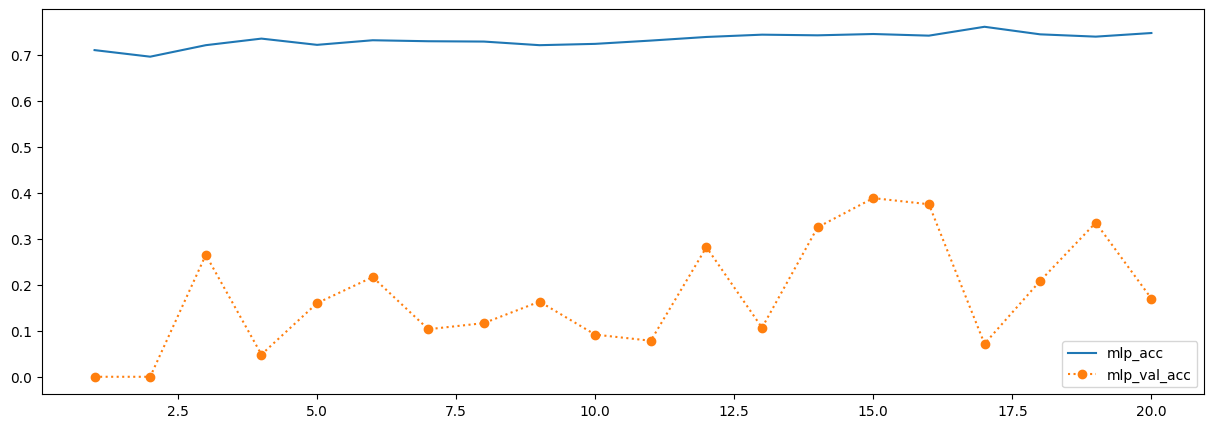

In [39]:
# mlp, cnn 학습 결과 시각화
plt.figure(figsize  = (15,5))

x_range = range(1, len(transfer_history2.history['accuracy']) + 1)
plt.plot(x_range, transfer_history2.history['accuracy'], label = 'mlp_acc')
plt.plot(x_range, transfer_history2.history['val_accuracy'], label = 'mlp_val_acc',
         marker = 'o', ls = ':')

plt.legend()
plt.show()